In [76]:
#Importamos las librerias necesarias para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


SyntaxError: invalid syntax (160573547.py, line 1)

In [77]:
#descargamos de kaggle el dataset y lo importamos como un dataframe de pandas
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
#Limpiamos el dataset de columnas que no son necesarias para el analisis
mantener = ['Survived','Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
df = df[mantener]
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [79]:
#Eliminamos los valores dupplicacos y observamos si hay valores nulos
df.drop_duplicates(inplace=True)
df.isnull().sum()


/tmp/ipykernel_33052/542314138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Survived     0
Pclass       0
Sex          0
Age         99
Fare         0
Embarked     2
dtype: int64

In [80]:
#Como en la edad hay valores nulos, vamos a reemplazarlos por la media
#Y en embarked vamos a reemplazarlos por la moda
media_edad=df['Age'].mean()
df['Age']= df['Age'].fillna(media_edad)

moda_embarked=df['Embarked'].mode()[0]
df['Embarked']= df['Embarked'].fillna(moda_embarked)

#y procedemos a verificar si hay valores nulos
df.isnull().sum()







/tmp/ipykernel_33052/3436222420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']= df['Age'].fillna(media_edad)
/tmp/ipykernel_33052/3436222420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']= df['Embarked'].fillna(moda_embarked)


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [81]:
df.describe()

,Survived,Pclass,Age,Fare
count,771.000000,771.000000,771.000000,771.000000
mean,0.415045,2.241245,29.817589,34.962964
std,0.493050,0.856699,13.749066,52.511933
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,21.500000,8.050000
50%,0.000000,3.000000,29.817589,15.900000
75%,1.000000,3.000000,36.000000,34.375000
max,1.000000,3.000000,80.000000,512.329200


Edad Media: 29.817589285714288
Edad Mediana: 29.817589285714284
Edad Moda: 29.817589285714284
Desviación Estándar de la Edad: 13.749066182913426


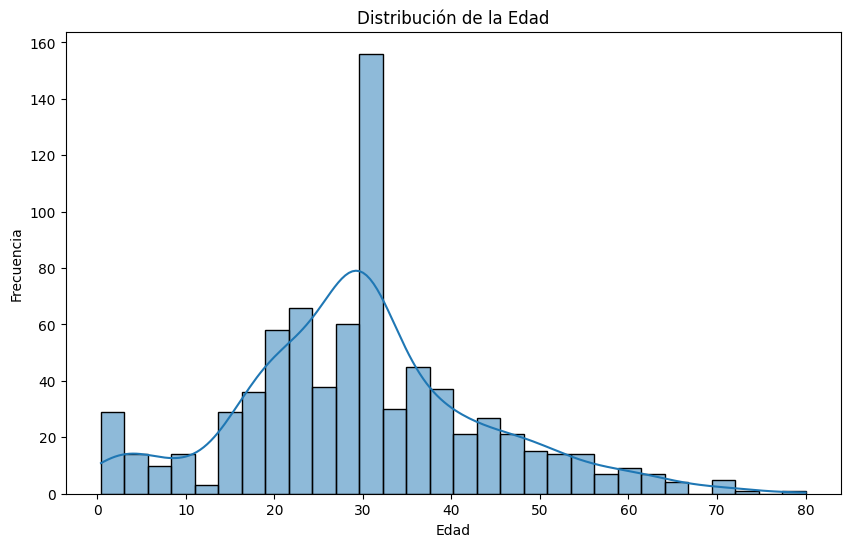

In [82]:
#Vamos a hacer un analisis de la variable "Age"

# Estadísticas Descriptivas de la Edad
edad_media = df['Age'].mean()
edad_mediana = df['Age'].median()
edad_moda = df['Age'].mode()[0]
#La edad moda me queda igual que la mediana porque es la que utilice para reemplazar los valores nulos.
edad_desviacion = df['Age'].std()

print(f"Edad Media: {edad_media}")
print(f"Edad Mediana: {edad_mediana}")
print(f"Edad Moda: {edad_moda}")
print(f"Desviación Estándar de la Edad: {edad_desviacion}")



# Distribución de la Edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()



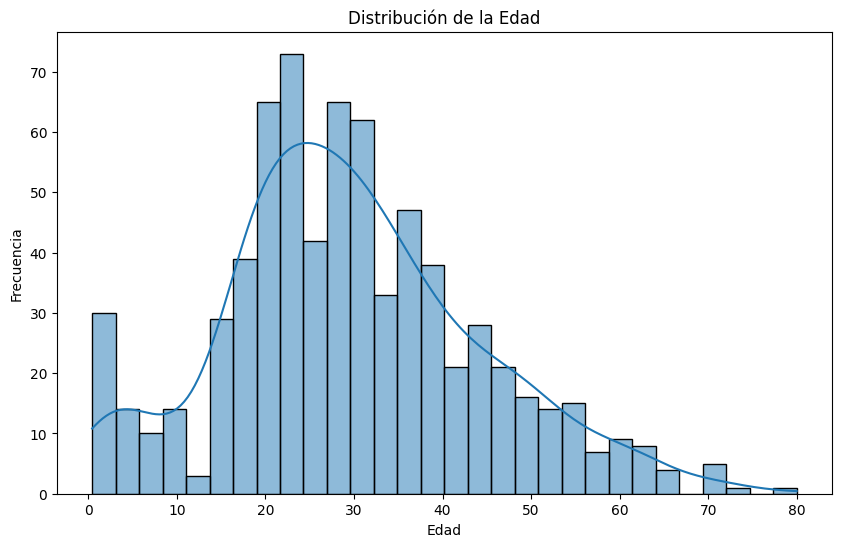

Edad Moda sin Nulos: 24.0


In [83]:
#En el grafico podemos observar que éste se ve alterado ya qye reemplazamos los valores nulos por la media.
#Para poder visualizar mejor la distribución de la edad, vamos a eliminar los valores nulos y volver a graficar.
df1 = pd.read_csv('train.csv')
df1 = df1[mantener]
df1.dropna(subset=['Age'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

edad_moda_sin_nulos = df1['Age'].mode()[0]
print(f"Edad Moda sin Nulos: {edad_moda_sin_nulos}")

Total de Pasajeros: 771
Sobrevivientes: 320
No Sobrevivientes: 451
Proporción de Sobrevivientes: 41.50453955901427
Proporción de No Sobrevivientes: 58.49546044098574


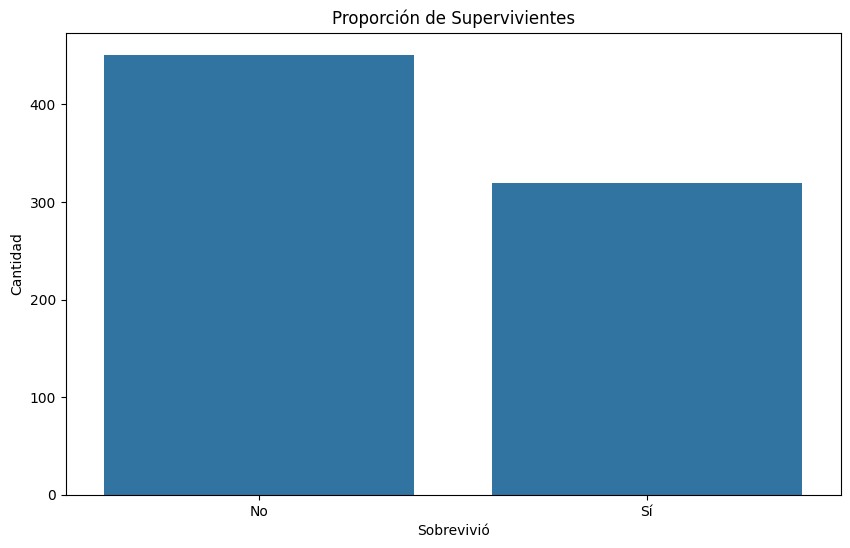

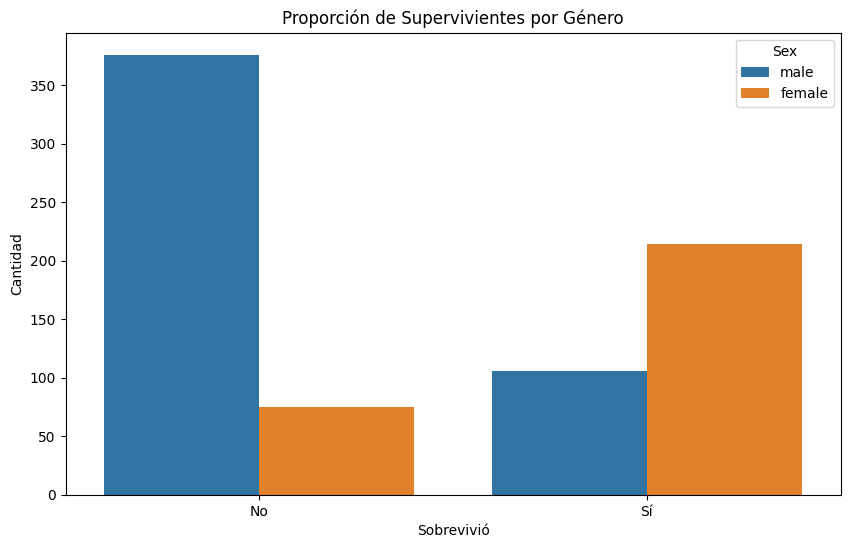

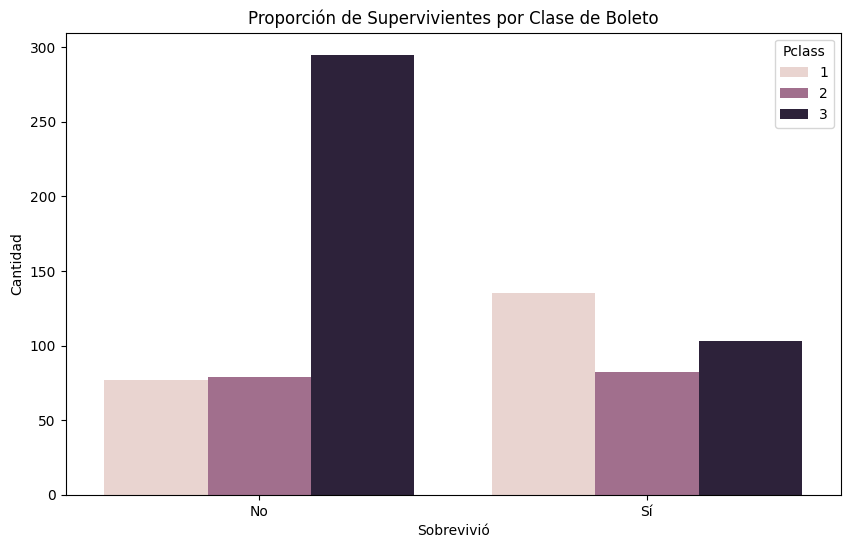

In [84]:
#Ahora vamos a hacer un estuido sobre la supervivencia de los pasajeros

total_pasajeros = df['Survived'].count()

for i in range(len(df['Survived'].value_counts())):
    sobrevivientes = df['Survived'].value_counts()[1]
    no_sobrevivientes = df['Survived'].value_counts()[0]

print(f"Total de Pasajeros: {total_pasajeros}")
print(f"Sobrevivientes: {sobrevivientes}")
print(f"No Sobrevivientes: {no_sobrevivientes}")

# Proporción de Sobrevivientes
proporcion_sobrevivientes = (sobrevivientes / total_pasajeros)*100
proporcion_no_sobrevivientes = (no_sobrevivientes / total_pasajeros)*100

print(f"Proporción de Sobrevivientes: {proporcion_sobrevivientes}")
print(f"Proporción de No Sobrevivientes: {proporcion_no_sobrevivientes}")

# Proporción de Supervivientes
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Proporción de Supervivientes')
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Proporción de Supervivientes por Género
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Proporción de Supervivientes por Género')
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Proporción de Supervivientes por Clase de Boleto
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Proporción de Supervivientes por Clase de Boleto')
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()






#En los graficos podemos observar que la mayoria de los sobrebivientes son mujeres y que la mayoria de los sobrevivientes son de la clase 1


In [85]:
#En los graficos podemos observar que la mayoria de los sobrebivientes son mujeres y que la mayoria de los sobrevivientes son de la clase 1


In [86]:
# Contar la cantidad de pasajeros por puerto de embarque
pasajeros_por_puerto = df['Embarked'].value_counts()

print(pasajeros_por_puerto)

Embarked
S    563
C    154
Q     54
Name: count, dtype: int64


#Segun la documentacion de kaggle, los puertos de embarque son:
#C = Cherbourg, Q = Queenstown, S = Southampton
#Podemos observar que la mayoria de los pasajeros embarcaron en Southampton

In [87]:
#Segun la documentacion de kaggle, los puertos de embarque son:
#C = Cherbourg, Q = Queenstown, S = Southampton
#Podemos observar que la mayoria de los pasajeros embarcaron en Southampton

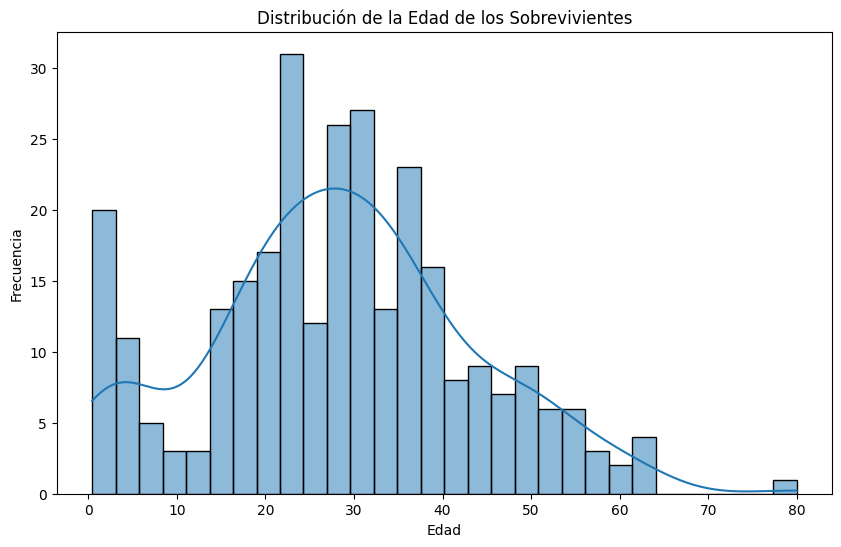

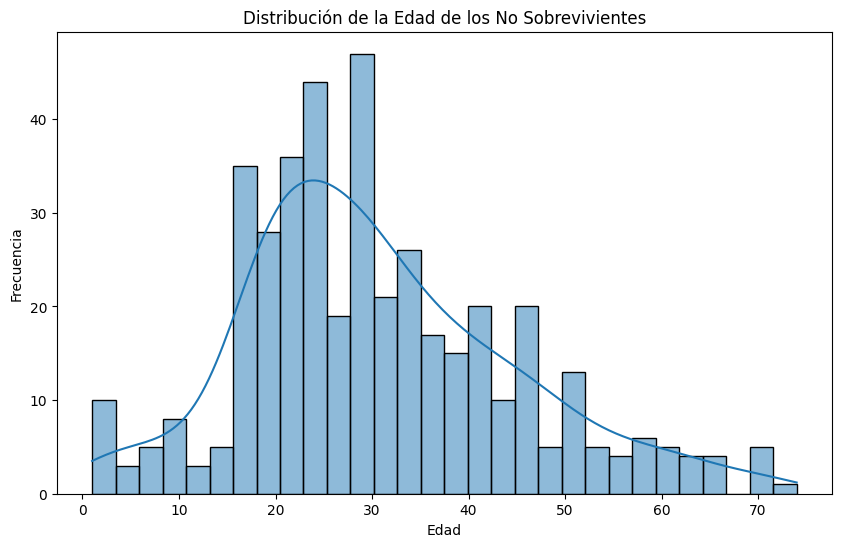

In [88]:
#Ahora vamos a hacer un analsisi de la relacion entre la edad y la supervivencia

# Distribución de la Edad de los Sobrevivientes
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['Survived'] == 1]['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad de los Sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


# Distribución de la Edad de los No Sobrevivientes
plt.figure(figsize=(10, 6))
sns.histplot(df1[df1['Survived'] == 0]['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad de los No Sobrevivientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [89]:
#En los graficos podemos observar que hay una tendencia a que los sobrevivientes sean menores de edad y los no sobrevivientes sean mayores de edad.


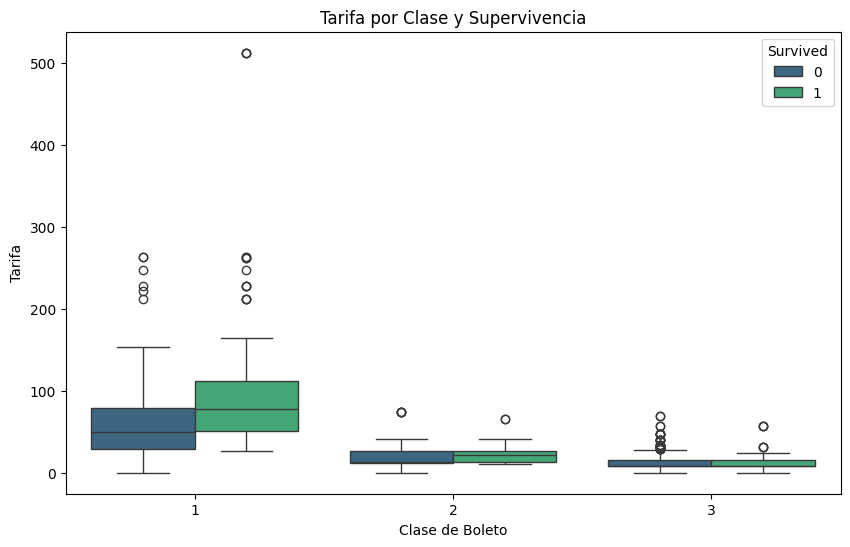

In [90]:
#Ahora vamos a hacer un analisis de la relacion entre la tarifa y la supervivencia

# Boxplot de la Tarifa por Clase y Supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='viridis')
plt.title('Tarifa por Clase y Supervivencia')
plt.xlabel('Clase de Boleto')
plt.ylabel('Tarifa')
plt.show()



In [91]:
#Y observamos que la clase 1 tiene una mayor variacion en su tarifa y una gran cantidad de sobrevivientes.

sobrevivientes_por_clase = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
print(sobrevivientes_por_clase)



Survived          0          1
Pclass                        
1         36.320755  63.679245
2         49.068323  50.931677
3         74.120603  25.879397


In [92]:
from scipy.stats import ttest_ind


# Separar las tarifas pagadas por los pasajeros que sobrevivieron y los que no sobrevivieron
tarifas_sobrevivieron = df[df['Survived'] == 1]['Fare']
tarifas_no_sobrevivieron = df[df['Survived'] == 0]['Fare']

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(tarifas_sobrevivieron, tarifas_no_sobrevivieron)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Conclusión de la Prueba de Hipótesis
if p_value < 0.05:
    conclusion = "Rechazamos la Hipótesis Nula (H₀). Hay una diferencia significativa en las tarifas pagadas entre los pasajeros que sobrevivieron y los que no sobrevivieron. Por lo que, lo concluido anteriromente es correcto."
else:
    conclusion = "No podemos rechazar la Hipótesis Nula (H₀). No hay una diferencia significativa en las tarifas pagadas entre los pasajeros que sobrevivieron y los que no sobrevivieron. Por lo que, lo concluido anteriromente es incorrecto."

print(conclusion)

Estadístico t: 7.071378955264689
Valor p: 3.4500542200284368e-12
Rechazamos la Hipótesis Nula (H₀). Hay una diferencia significativa en las tarifas pagadas entre los pasajeros que sobrevivieron y los que no sobrevivieron. Por lo que, lo concluido anteriromente es correcto.


Coeficiente de Correlación de Pearson: 0.0912035836586716


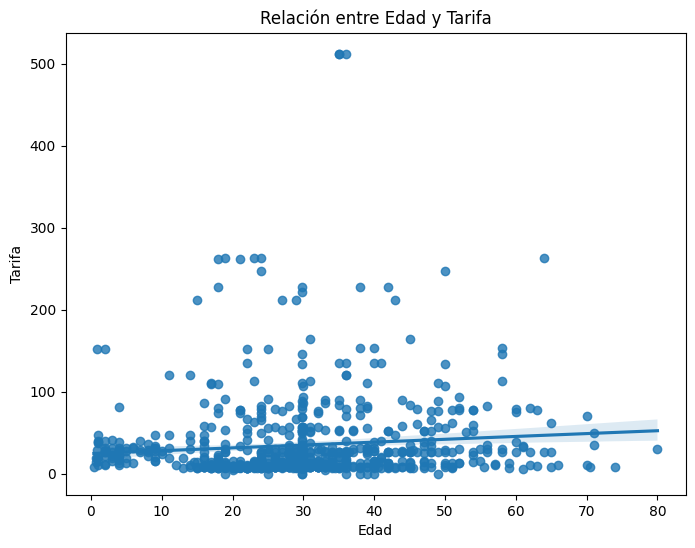

In [93]:
#Ahora vamos a hacer un analsisi de la correlacion entre la edad y la tarifa.
from scipy.stats import pearsonr


r,_ = pearsonr(df['Age'], df['Fare'])

print(f"Coeficiente de Correlación de Pearson: {r}")

# Crear un gráfico de dispersión con ajuste lineal
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Fare', data=df)

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Relación entre Edad y Tarifa')

# Mostrar el gráfico
plt.show()



#Esto nos indica que no hay una correlacion entre la edad y la tarifa pagada por los pasajeros.


In [94]:
#Esto nos indica que no hay una correlacion entre la edad y la tarifa pagada por los pasajeros.


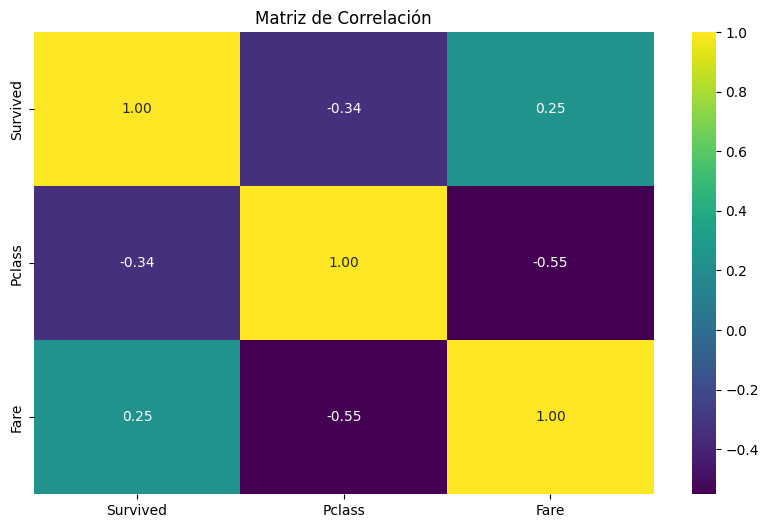

In [95]:
#Voyr a hacer un Heatmap para ver la correlacion entre las variables 
#Para poder hacerlo, voy a tener que convertir las variables Sex y Embarked en variables numericas



# Crear un heatmap de la matriz de correlación sin 'Age' y 'Embarked'
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Age','Sex','Embarked']).corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Pclass y Survived (-0.34):

Una correlación negativa moderada.
Esto sugiere que a medida que aumenta la clase del boleto (de 1 a 3), la probabilidad de supervivencia disminuye.
Los pasajeros de primera clase tenían más probabilidades de sobrevivir que los de segunda y tercera clase.


Survived y Fare (0.25):

Una correlación positiva débil.
Esto sugiere que los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de supervivencia, aunque la relación no es muy fuerte.


Pclass y Fare (-0.55):

Una correlación negativa moderadamente fuerte.
Esto sugiere que a medida que aumenta la clase del boleto (de 1 a 3), la tarifa pagada disminuye. En otras palabras, los pasajeros de primera clase pagaron tarifas más altas que los de segunda y tercera clase.

